In [1]:
from pandas_datareader import data as pdr # для понимания дат
import datetime # для манипуляций с датами
from datetime import timedelta # для вычесления вчерашнего дня
import pandas as pd # для работы с данными
import yfinance as yf # для подключения к Yahoo Finance
import numpy as np # для вычислений
import matplotlib.pyplot as plt #для визуализации
import matplotlib.dates as mdates

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
start = '2000-01-01'
today = datetime.date.today()
days_before = datetime.date.today() - timedelta(days=3)
now = datetime.datetime.now().strftime('%d.%m.%Y %H:%M')
now2 = datetime.datetime.now().strftime('%Y%m%d%H%M')
now2

'202004031438'

In [4]:
yf.pdr_override()
finance = pdr.get_data_yahoo(["BZ=F"], start=start, end=today, interval='1d')
freshdata = pdr.get_data_yahoo(["BZ=F"], start=days_before, end=today, interval='1m')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
fresh = freshdata.iloc[[-1]]
data = pd.concat([finance, fresh])
data = data[['Close']]
time = data.index
freshoil = fresh[['Close']].values.tolist()
fresh = fresh[['Close']]
freshtime = fresh.index
oilprint = '{:.2f}'.format(freshoil[0][0]).replace('.',',')

In [6]:
investing = pd.read_csv('investing_data.csv')
price = investing[['Дата', 'Цена']]

In [7]:
history_x = pd.to_datetime(price['Дата'], format = '%d.%m.%Y')

In [8]:
history_y = price['Цена'].str.replace(",", ".", case = False).astype(float)

In [9]:
plt.rcParams['font.sans-serif'] = 'GOST UI 2'

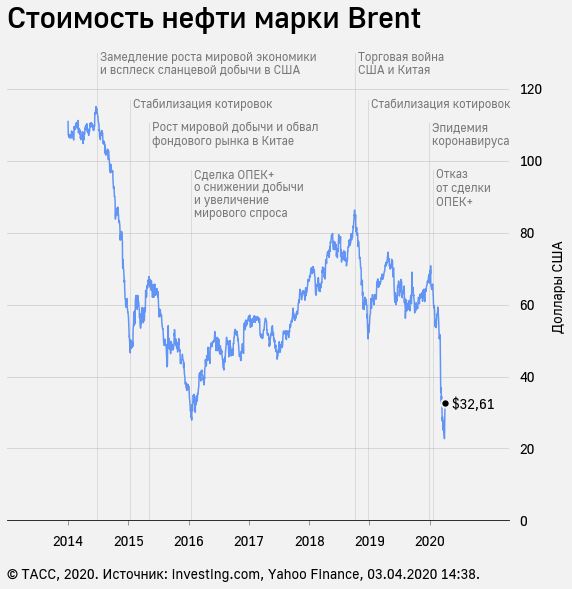

In [10]:
fig = plt.figure(
    figsize=(9, 8.6),
    facecolor='#F2F2F2'
)

ax = fig.add_subplot()
ax.plot(data, color='#6294F5')
ax.plot(history_x, history_y, color='#6294F5')
ax.scatter(freshtime, freshoil, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

ax.yaxis.tick_right()
ax.tick_params(axis="x", length=5, pad=10, labelsize = 14, color = 'grey') 
ax.tick_params(axis="y", length=0, pad=10, labelsize = 14)
ax.set_xticks(['2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01'])
ax.set_xticklabels(['2014','2015','2016','2017','2018','2019','2020'])
ax.grid(axis = 'y', color = 'grey', alpha = .3)
ax.axhline(y = 0, color = 'black', linewidth=1)

sumermax = 130

ax.axvline(x = '2014-06-24', ymin = 0, ymax = 1,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2014-06-24', sumermax*1 - sumermax/60, ' Замедление роста мировой экономики', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2014-06-24', sumermax*1 - sumermax/22, ' и всплеск сланцевой добычи в США', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2015-01-12', ymin = 0, ymax = .9,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2015-01-12', sumermax*.9 - sumermax/60, ' Cтабилизация котировок', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2015-05-05', ymin = 0, ymax = .85,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2015-05-05', sumermax*.85 - sumermax/60, ' Рост мировой добычи и обвал', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2015-05-05', sumermax*.85 - sumermax/22, ' фондового рынка в Китае', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2016-01-18', ymin = 0, ymax = .75,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2016-01-18', sumermax*.75 - sumermax/60, ' Сделка ОПЕК+', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2016-01-18', sumermax*.75 - sumermax/22, ' о снижении добычи', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2016-01-18', sumermax*.75 - sumermax/13.7, ' и увеличение', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2016-01-18', sumermax*.75 - sumermax/10, ' мирового спроса', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2018-10-03', ymin = 0, ymax = 1,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2018-10-03', sumermax*1 - sumermax/60, ' Торговая война', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2018-10-03', sumermax*1 - sumermax/22, ' США и Китая', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2018-12-24', ymin = 0, ymax = .9,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2018-12-24', sumermax*.9 - sumermax/60, ' Cтабилизация котировок', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2019-12-31', ymin = 0, ymax = .85,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2019-12-31', sumermax*.85 - sumermax/60, ' Эпидемия ', fontsize=12, color='black', zorder=2.5, alpha = .5,)
ax.text('2019-12-31', sumermax*.85 - sumermax/22, ' коронавируса ', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.axvline(x = '2020-01-20', ymin = 0, ymax =  .75,  linewidth=1, color='grey', zorder=2.5, alpha = .2)
ax.text('2020-01-20', sumermax*.75 - sumermax/60, ' Отказ', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2020-01-20', sumermax*.75 - sumermax/22, ' от сделки', fontsize=12, color='black', zorder=2.5, alpha = .5)
ax.text('2020-01-20', sumermax*.75 - sumermax/13, ' ОПЕК+', fontsize=12, color='black', zorder=2.5, alpha = .5)

ax.set_ylim(0, sumermax)

ax.set_ylim(0, sumermax)
ax.margins(x=.16)
ax.set_title('Стоимость нефти марки Brent', fontweight = 'medium', fontsize=30, loc='left',pad=25)
ax.set_ylabel('Доллары США', fontsize=14, labelpad=10)
ax.yaxis.set_label_position("right")

credit_x = ax.get_xlim()[0]
credit_y = 0 - ax.get_ylim()[1]/8

plt.text(credit_x, credit_y, ('© ТАСС, 2020. Источник: investing.com, Yahoo Finance, '+now+'.'), fontsize=14)
ax.text(freshtime, freshoil[0][0] - 1.5, '  $' + oilprint, fontsize=14)
ax.patch.set_facecolor('#F2F2F2')

fig.savefig(
    'Oil_Brent_TASS ' + now2 + '.png',
    dpi=300,
    transparent = False,
    bbox_inches = 'tight',
    pad_inches = .5,
    facecolor = '#F2F2F2'
)

plt.show()